VERGNES Léa & SALLABERRY Deya

M2 FEADep ENS de Lyon

# Introduction pédagogique

**Niveau** : L3

**Objectifs** (TP Python) :
- Afficher courbe à partir formule donnée
- Savoir créer des boutons pour améliorer la courbe

**Objectifs** (Cours) :
- Comprendre l'évolution des courbes i-E grâce à un programme python


# Étude du courant électrochimique en régime mixte

On considère une réaction électrochimique de type :

$$
\text{Ox} + n\ e^- \rightleftharpoons \text{Red}
$$

Le courant mesuré à l’électrode dépend de plusieurs phénomènes :
- Le transfert de charge à l’interface électrode-solution (contrôle cinétique),
- Le transport de matière par diffusion dans la couche limite (contrôle diffusif).

## 1. Régime électronique (transfert de charge)

En régime purement cinétique, le courant est donné par l'expression de Butler-Volmer :

$$
i_{\text{charge}} = n~F~A~k^0 \left[ c_\text{Ox} \exp\left( -\alpha~n f (E - E^{\huge \circ}) \right) - c_\text{Red} \exp\left( (1 - \alpha)~n f (E - E^{\huge \circ}) \right) \right]
$$

avec :

$$
f = \frac{F}{RT}
$$

où :
- $k^0$  est la constante de vitesse standard,
- $\alpha$ est le coefficient de transfert de charge,
- $E^{\huge \circ}$ est le potentiel standard du couple redox.

## 2. Régime diffusif (transport de matière)

Lorsque la vitesse de réaction est très rapide, c’est le transport de matière qui devient limitant. Le courant est alors contrôlé par la diffusion :

$$
i_{\text{diff}} = \frac{i_{\text{lim}}^\text{Red} \exp(nf(E - E^{\huge \circ}))~+~i_{\text{lim}}^\text{Ox}}{1 + \exp(nf(E - E^{\huge \circ}))}
$$

avec :

$$
i_{\text{lim}}^\text{Red} = nFA \frac{D_\text{Red}}{\delta} c_\text{Red}~~~et~ \quad
i_{\text{lim}}^\text{Ox} = -nFA \frac{D_\text{Ox}}{\delta} c_\text{Ox}
$$

où  $\delta$ est l'épaisseur de la couche limite de diffusion.

## 3. Régime mixte

Dans le cas général, les deux phénomènes sont simultanés. On peut approximer le courant total par la moyenne géométrique des contributions cinétique et diffusif :

$$
i = \frac{i_{\text{charge}} \cdot i_{\text{diff}}}{i_{\text{charge}} + i_{\text{diff}}}
$$

Ce modèle permet de rendre compte de la forme sigmoïdale des courbes intensité-potentiel, avec des plateaux correspondant aux courants limites et une zone centrale sensible à la vitesse de transfert électronique.




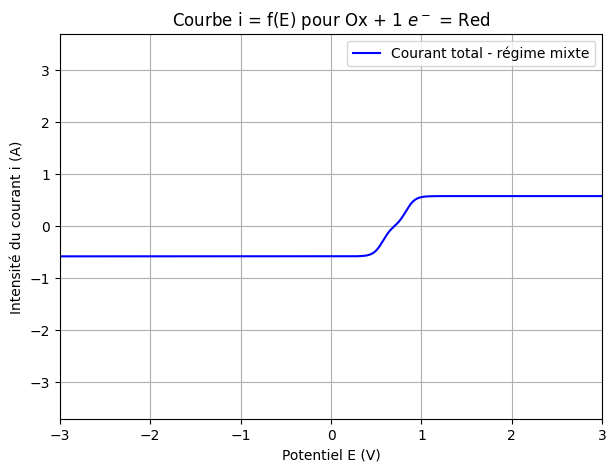

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres électrochimiques
alpha = 0.5  # Coefficient de transfert de charge anodique
F = 96500  # Constante de Faraday
R = 8.314  # Constante des gaz parfaits
T = 298  # Température en Kelvin
f = F / (R * T)  # Simplification d'écriture
Es = 0.7  # Potentiel standard du couple Ox/Red (V/ESH)
A = 1e-4  # Aire électrode (m²)
DO = 6e-6  # Coefficient de diffusion de l'oxydant (m²/s)
DR = 6e-6  # Coefficient de diffusion du réducteur (m²/s)
delta = 1e-6  # Épaisseur de la couche limite de diffusion (m)
concentr = 0.01  # Concentration de base en mol/L
cO, cR = concentr, concentr # Concentration en Oxydant et Réducteur en mol/L
n = 1 # nombre électrons échangés

# Discrétisation de E
E = np.linspace(-3, 3, 10000)


# Constantes de vitesse de transport de charge
k0 = 5e-1

# Constantes de vitesse de transport de matière
mO, mR = DO / delta, DR / delta

# Courants limites de diffusion
ial, icl = n * F * A * mR * cR, -n * F * A * mO * cO

# Régime transfert électronique (Butler-Volmer)
# Attention aux expressions de Butler Volmer : si courant échange i0 alors E_nernst
#                                              si constante vitesse k0 alors E_standart (Es)
ia_charge = n * F * A * k0 * cR * np.exp(alpha * n * f * (E - Es))
ic_charge = -n * F * A * k0 * cO * np.exp(-(1 - alpha) * n * f * (E - Es))
i_charge = ia_charge + ic_charge

# Régime diffusif
i_diff = (ial * np.exp(n * f * (E - Es)) + icl) / (1 + np.exp(n * f * (E - Es)))

# Régime mixte (moyenne géométrique) : courant total
i_tot=(i_charge*i_diff)/(i_charge+i_diff)

# Tracé
plt.figure(figsize=(7, 5))
plt.grid()
plt.title("Courbe i = f(E) pour Ox + 1 $e^-$ = Red")
plt.xlabel("Potentiel E (V)")
plt.ylabel("Intensité du courant i (A)")
plt.xlim(E.min(), E.max())  # Échelle dynamique en x
plt.ylim(-3.7, 3.7)
plt.plot(E, i_tot, label="Courant total - régime mixte", color="b")
plt.legend()
plt.show()

---
---
### Comment créer des boutons avec Widget ?

⚠️ Penser à importer les librairies :

In [ ]:
import ipywidgets as widgets
from IPython.display import display


#### 1. Paramètres du widget 'IntSlider' :

Le widget `IntSlider` permet de sélectionner interactivement une **valeur entière** dans une plage définie.  
Peut être un bon choix pour simuler le nombre d’électrons échangés (n)  :



In [ ]:
label_electron = widgets.HTML('Nombre d électrons échangés :')
bouton_electron = widgets.IntSlider(
    value=1,
    min=1,
    max=3,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': '150px'}
)

| Paramètre                         | Description                                                    |
|----------------------------------|----------------------------------------------------------------|
| `value=1`                        | Valeur initiale affichée (ici 1 électrons).                    |
| `min=1`, `max=3`                 | Plage de sélection : de 1 à 3 électrons.                       |
| `step=1`                         | Incrément : valeurs entières uniquement.                       |
| `disabled=False`                 | Le curseur est actif (modifiable).                             |
| `continuous_update=False`        | La fonction liée s’active seulement quand on relâche le curseur. |
| `orientation='horizontal'`       | Affichage horizontal.                                          |
| `readout=True`                   | Affiche la valeur à droite du curseur.                         |
| `readout_format='d'`             | Affichage en entier (format "decimal").                        |
| `style={'description_width': '150px'}` | Ajuste l'affichage de la description du bouton.                |


---
#### 2. Paramètres du widget 'RadioButtons' :

Le widget `RadioButtons` permet de proposer à l’utilisateur une **liste d’options exclusives** (sélection d’un seul choix à la fois).  
Peut être un bon choix pour faire varier des conditions expérimentales comme ici, les proportions relatives entre l’oxydant et le réducteur :

In [ ]:
label_concentration = widgets.HTML('Proportion relative en oxydant et en réducteur :')
bouton_concentration = widgets.RadioButtons(
    options=['même concentration', '2 fois plus Ox', '2 fois plus Red', 'seulement Red', 'seulement Ox'],
    layout=widgets.Layout(width='100%')
)

| Paramètre                                     | Description                                                                 |
|----------------------------------------------|-----------------------------------------------------------------------------|
| `options=[...]`                              | Liste des choix proposés à l’utilisateur (un seul sélectionnable à la fois). |
| `layout=widgets.Layout(width='100%')`        | Étend le widget sur toute la largeur disponible (meilleure lisibilité).     |         |      |
| `widgets.HTML('...')`                        | Permet d’ajouter un label personnalisé au-dessus du bouton (permet l'alignement à gauche).         |



---
#### 3. Mode interactif et affichage des boutons :

Il est ensuite nécessaire de lier dynamiquement l’affichage de la courbe i-E aux choix de l’utilisateur faits avec les boutons avec une fonction qui met à jour les paramètres.

Ensuite, les différents boutons sont affichés individuellement avec la fonction display.


In [ ]:
def fonction_mise_a_jour(proportion_relative, n, vitesse_transfert_charge):
    if proportion_relative == 'même concentration':
        cO, cR = concentr, concentr
    elif proportion_relative == '2 fois plus Ox':
        cO, cR = 2 * concentr, concentr
    elif proportion_relative == '2 fois plus Red':
        cO, cR = concentr, 2 * concentr
    elif proportion_relative == 'seulement Red':
        cO,cR = 0, concentr
    elif proportion_relative == 'seulement Ox':
        cO,cR = concentr, 0


    # Constantes de vitesse de transport de charge
    k0 = 5e-1 if vitesse_transfert_charge == "Système rapide" else 1e-6


display(widgets.interactive_output(fonction_mise_a_jour, {'proportion_relative': bouton_concentration, 'n': bouton_electron, 'vitesse_transfert_charge': bouton_vitesse} ))
display(label_concentration, bouton_concentration)
display(label_electron, bouton_electron)
display(bouton_vitesse)

Output()

HTML(value='Proportion relative en oxydant et en réducteur :')

RadioButtons(layout=Layout(width='100%'), options=('même concentration', '2 fois plus Ox', '2 fois plus Red', …

HTML(value='Nombre d électrons échangés :')

IntSlider(value=1, continuous_update=False, max=3, min=1, style=SliderStyle(description_width='150px'))

RadioButtons(description='Vitesse transfert charge :', options=('Système rapide', 'Système lent'), style=Descr…

---
---
# Affichage des courbes i-E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML

# Paramètres électrochimiques
alpha = 0.5  # Coefficient de transfert de charge anodique
F = 96500  # Constante de Faraday
R = 8.314  # Constante des gaz parfaits
T = 298  # Température en Kelvin
f = F / (R * T)  # Simplification d'écriture
Es = 0.7  # Potentiel standard du couple Ox/Red (V/ESH)
A = 1e-4  # Aire électrode (m²)
DO = 6e-6  # Coefficient de diffusion de l'oxydant (m²/s)
DR = 6e-6  # Coefficient de diffusion du réducteur (m²/s)
delta = 1e-6  # Épaisseur de la couche limite de diffusion (m)
concentr = 0.01  # Concentration de base en mol/L
cO_1, cR_1 = concentr, concentr # Astuce d'affichage pour comparer à la situation de base
n_1 = 1 # même chose
k0_1 = 5e-1 # même chose

# Discrétisation de E
E = np.linspace(-3, 3, 10000)

def fonction_mise_a_jour(proportion_relative, n, vitesse_transfert_charge):
    if proportion_relative == 'même concentration':
        cO, cR = concentr, concentr
    elif proportion_relative == '2 fois plus Ox':
        cO, cR = 2 * concentr, concentr
    elif proportion_relative == '2 fois plus Red':
        cO, cR = concentr, 2 * concentr
    elif proportion_relative == 'seulement Red':
        cO,cR = 0, concentr
    elif proportion_relative == 'seulement Ox':
        cO,cR = concentr, 0


    # Constantes de vitesse de transport de charge
    k0 = 5e-1 if vitesse_transfert_charge == "Système rapide" else 1e-6

    # Constantes de vitesse de transport de matière
    mO, mR = DO / delta, DR / delta

    # Courants limites de diffusion
    ial_1, icl_1 = n_1 * F * A * mR * cR_1, -n_1 * F * A * mO * cO_1 # Astuce d'affichage pour comparer à la situation de base
    ial, icl = n * F * A * mR * cR, -n * F * A * mO * cO

    # Régime transfert électronique (Butler-Volmer)
    # Attention aux expressions de Butler Volmer : si courant échange i0 alors E_nernst
    #                                              si constante vitesse k0 alors E_standart (Es)
    ia_charge_1 = n_1 * F * A * k0_1 *cR_1 * np.exp(alpha * n_1 * f * (E - Es)) # Astuce d'affichage pour comparer à la situation de base
    ic_charge_1 = -n_1 * F * A * k0_1 *cO_1 * np.exp(-(1 - alpha) * n_1 * f * (E - Es)) # Même chose
    i_charge_1 = ia_charge_1 + ic_charge_1 # Même chose

    ia_charge = n * F * A * k0 *cR * np.exp(alpha * n * f * (E - Es))
    ic_charge = -n * F * A * k0 *cO * np.exp(-(1 - alpha) * n * f * (E - Es))
    i_charge = ia_charge + ic_charge

    # Régime diffusif
    i_diff_1 = (ial_1 * np.exp(n_1 * f * (E - Es)) + icl_1) / (1 + np.exp(n_1 * f * (E - Es))) # Astuce d'affichage pour comparer à la situation de base
    i_diff = (ial * np.exp(n * f * (E - Es)) + icl) / (1 + np.exp(n * f * (E - Es)))

    # Régime mixte (moyenne géométrique) : courant total
    i_tot_1=(i_charge_1*i_diff_1)/(i_charge_1+i_diff_1) # Astuce d'affichage pour comparer à la situation de base
    i_tot=(i_charge*i_diff)/(i_charge+i_diff)


    # Tracé
    plt.figure(figsize=(7, 5))
    plt.grid()
    plt.title("Courbe i = f(E) pour Ox + 1 $e^-$ = Red")
    plt.xlabel("Potentiel E (V)")
    plt.ylabel("Intensité du courant i (A)")
    plt.xlim(E.min(), E.max())  # Échelle dynamique en x
    plt.ylim(-3.7, 3.7)
    plt.plot(E, i_tot_1, label="Courant total - régime mixte - situation de base", color="b", linestyle='--')
    plt.plot(E, i_tot, label="Courant total - régime mixte", color="b")
    plt.legend()
    plt.show()

# Création des boutons de sélection
label_concentration = widgets.HTML('Proportion relative en oxydant et en réducteur :')
bouton_concentration = widgets.RadioButtons(
    options=['même concentration', '2 fois plus Ox', '2 fois plus Red', 'seulement Red', 'seulement Ox'],
    layout=widgets.Layout(width='100%')
)

label_electron = widgets.HTML('Nombre d électrons échangés :')
bouton_electron = widgets.IntSlider(
    value=1,
    min=1,
    max=3,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style={'description_width': '150px'}
)

label_vitesse = widgets.HTML('Vitesse de transfert de charge:')
bouton_vitesse = widgets.RadioButtons(
    options=['Système rapide', 'Système lent'],
    description='Vitesse transfert charge :',
    style={'description_width': '150px'}
)

# Mode intéractif
display(widgets.interactive_output(fonction_mise_a_jour, {'proportion_relative': bouton_concentration, 'n': bouton_electron, 'vitesse_transfert_charge': bouton_vitesse} ))
display(label_concentration, bouton_concentration)
display(label_electron, bouton_electron)
display(bouton_vitesse)

Output()

HTML(value='Proportion relative en oxydant et en réducteur :')

RadioButtons(layout=Layout(width='100%'), options=('même concentration', '2 fois plus Ox', '2 fois plus Red', …

HTML(value='Nombre d électrons échangés :')

IntSlider(value=1, continuous_update=False, max=3, min=1, style=SliderStyle(description_width='150px'))

RadioButtons(description='Vitesse transfert charge :', options=('Système rapide', 'Système lent'), style=Descr…

## Sources :


*   Cours sur les widgets de Jean Lamerenx dans le cadre des JIREC 2024
*   Programme Python Manon Leconte

